# 5. Visualization with Matplotlib

## 5.1 Introduction

## 5.2 A Simple Plot

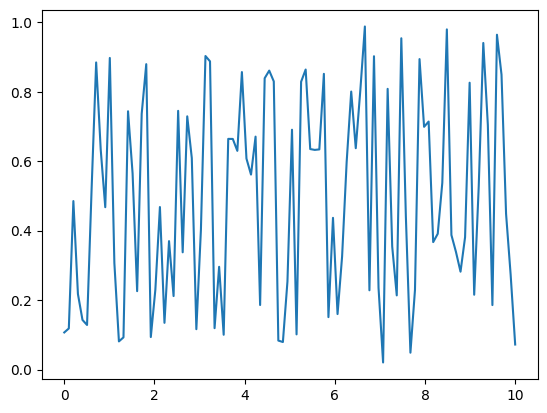

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
plt.plot(x,y);

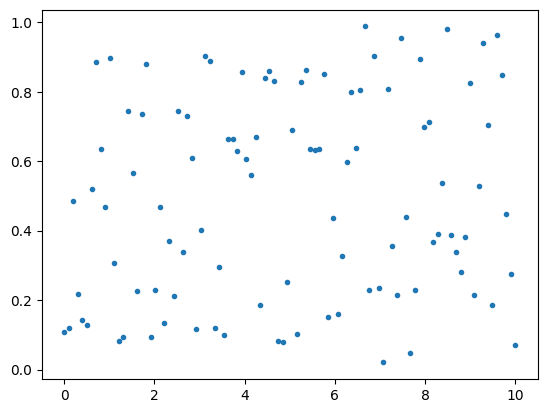

In [2]:
plt.plot(x,y,'.');

## 5.3 Figure and Axes

## 5.4 Subplots

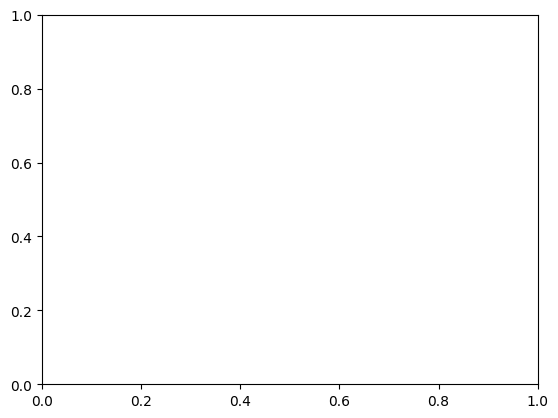

In [3]:
fig, ax = plt.subplots()

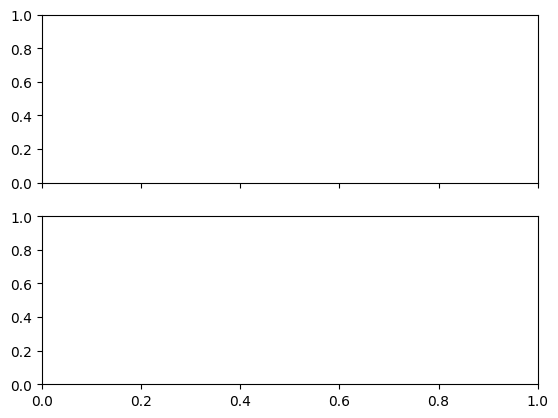

In [4]:
fig2,ax2 = plt.subplots(2,sharex=True)

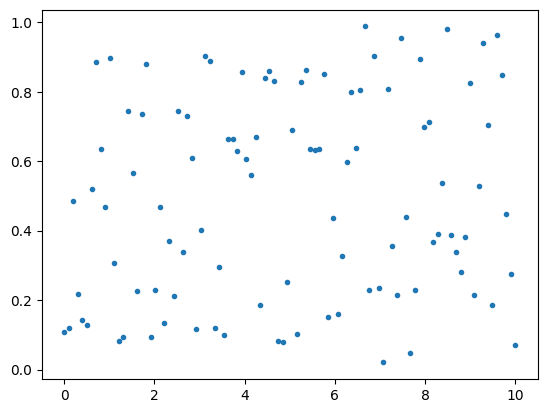

In [5]:
fig, ax = plt.subplots()
ax.plot(x,y,'.')
plt.show();

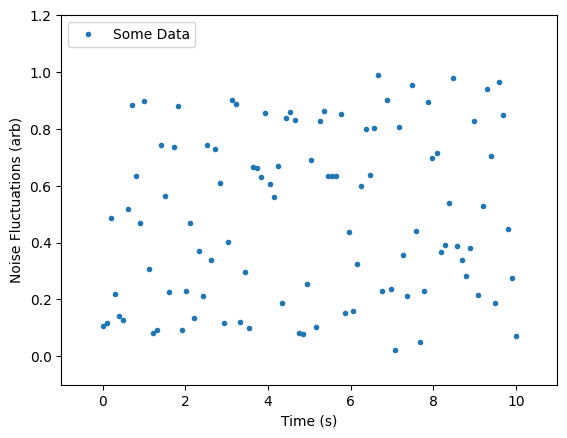

In [6]:
fig, ax = plt.subplots()
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
plt.show();

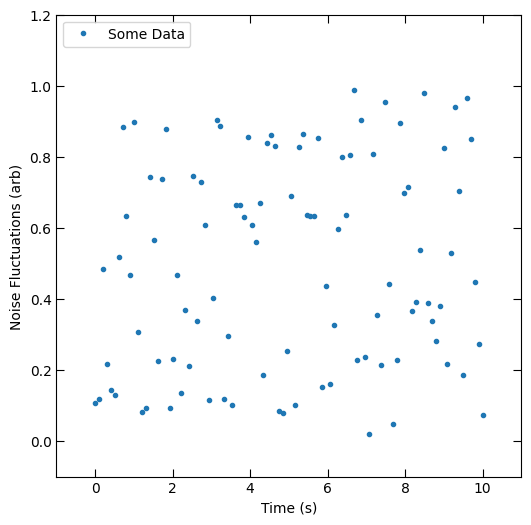

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
#old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
#new stuff

ax.tick_params(axis='both',
               direction='in',
               length=6,
               top=True,
               right=True)
plt.show();

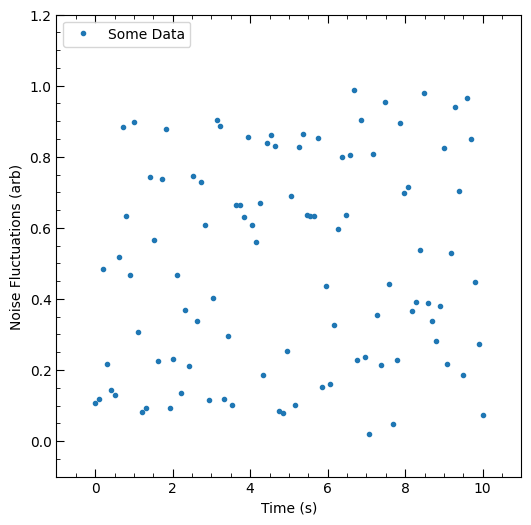

In [8]:
#MultipleLocator를 import하여 에러가 뜨지 않도록 하였습니다. -소정
from matplotlib.ticker import MultipleLocator 
#####

fig, ax = plt.subplots(figsize=(6,6))
#old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
for prop in [('major',6),('minor',3)]:
    ax.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
plt.show();

## 5.7 Adjusting Font and Fontsizes

In [9]:
plt.rc("font",size=16,family='serif')

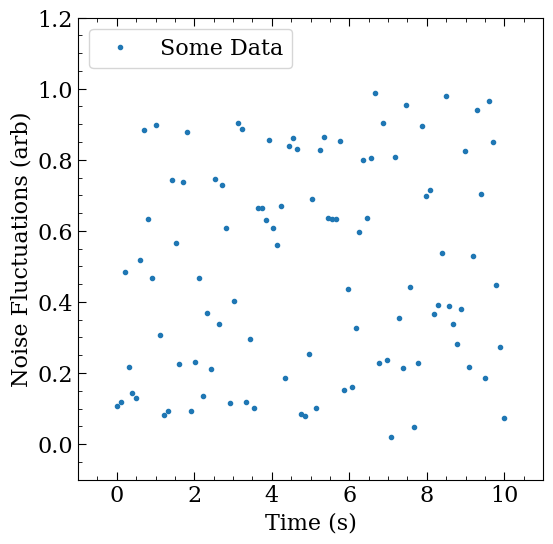

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
#old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
for prop in [('major',6),('minor',3)]:
    ax.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
plt.show();

In [11]:
#Change the fontsize of an axis label
ax.set_ylabel('Time (s)',fontsize=15)
#Change the fontsize of the tick labels
ax.tick_params(labelsize=15)
#Change the fontsize in the legend
ax.legend(loc=1, prop={'size':15})

### 5.7.1 LaTeX in Labels

## 5.8 Multiple Subplots

In [12]:
new_y = np.random.random(size=len(x))

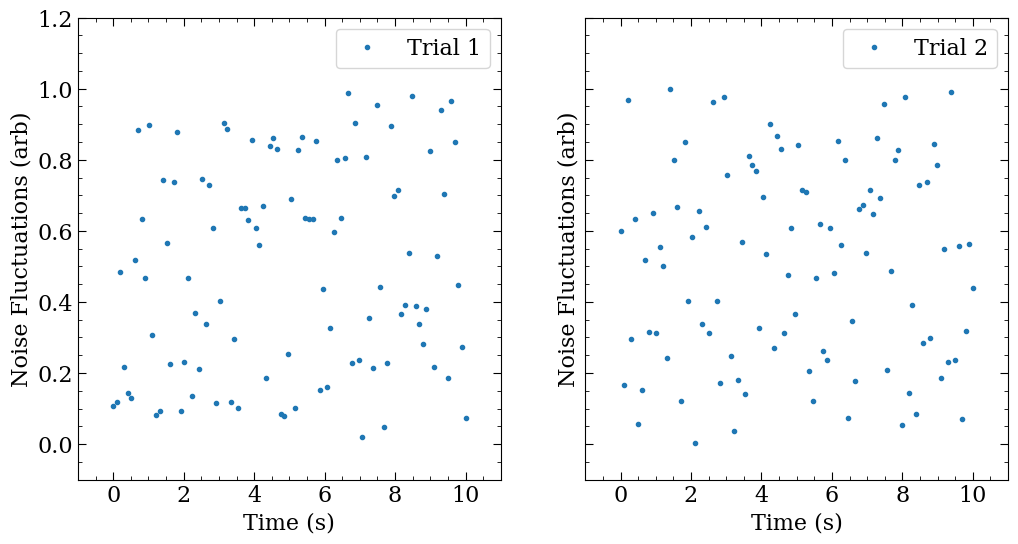

In [13]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
# old stuff
ax[0].plot(x, y, '.', label = 'Trial 1')
ax[1].plot(x, new_y, '.', label = 'Trial 2')

XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)

for a in ax:
    a.set_xlabel('Time (s)')
    a.set_ylabel('Noise Fluctuations (arb)')
    a.set_xlim(-1,11)
    a.set_ylim(-0.1,1.2)
    for prop in [('major',6),('minor',3)]:
        a.xaxis.set_minor_locator(XminorLocator)
        a.yaxis.set_minor_locator(YminorLocator)
        a.legend(loc=1)
        a.tick_params(which=prop[0],
                      axis='both',
                      direction='in',
                      length=prop[1],
                      top=True,
                      right=True)

plt.show();

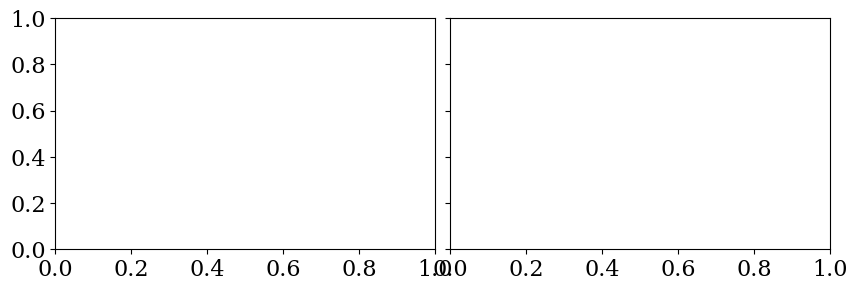

In [42]:
#Notice the sharey setting now added
fig, ax = plt.subplots(1,2,sharey=True,figsize=(10,3))

# All other plotting code here
# subplots adjust to bring the spacing in
plt.subplots_adjust(left=None, 
                    bottom=None, 
                    right=None, 
                    top=None,
                    wspace=0.04, 
                    hspace=None)

plt.show()

## 5.9 Subplot Mosaic

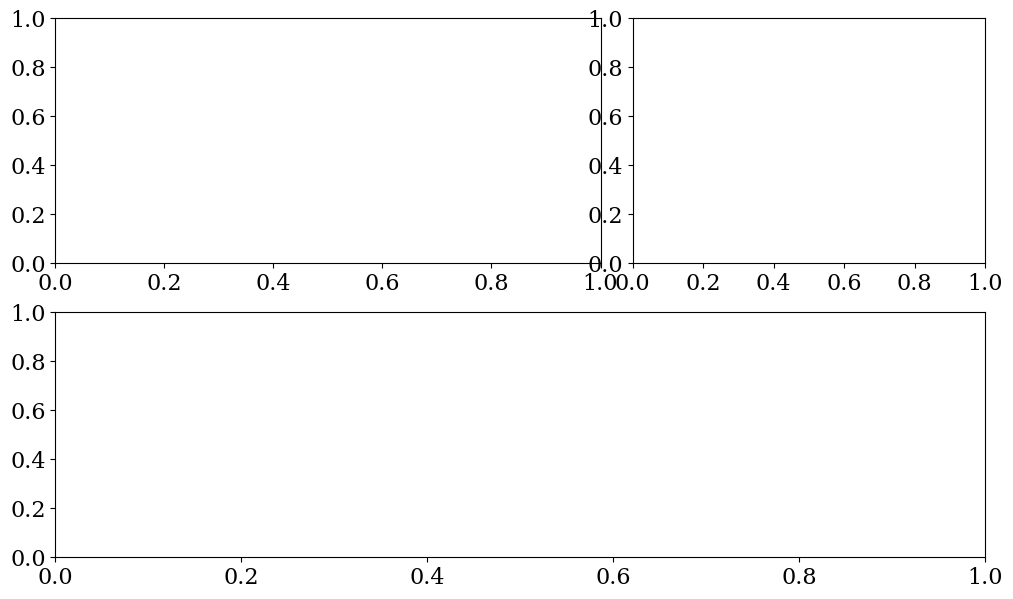

In [15]:
layout="""
AAABB
CCCCC
"""
fig, ax = plt.subplot_mosaic(layout,figsize=(12,7))


In [16]:
# fig.save()

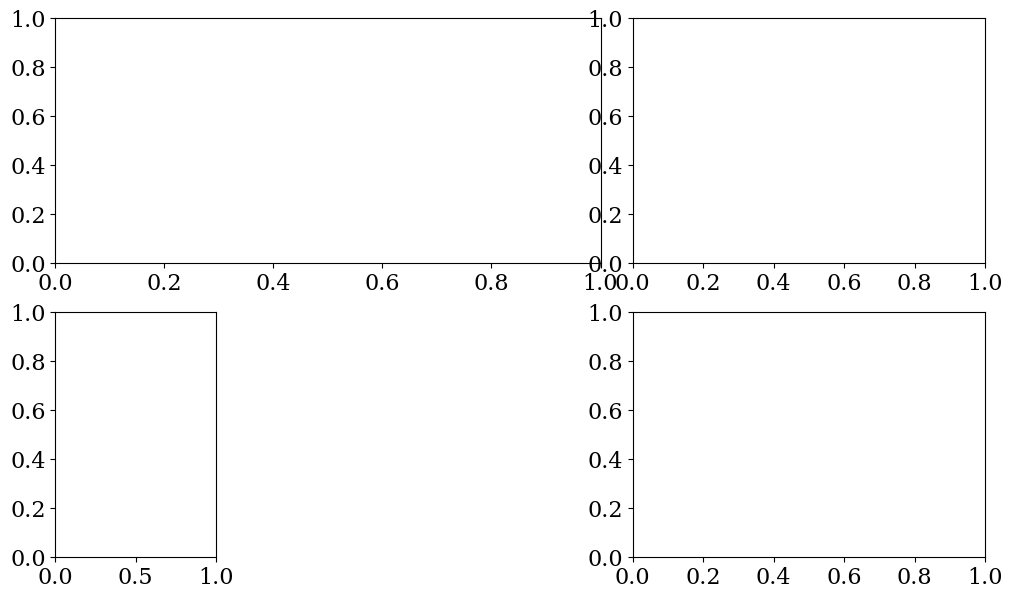

In [17]:
layout="""
AAABB
C..DD
"""
fig, ax = plt.subplot_mosaic(layout,figsize=(12,7))

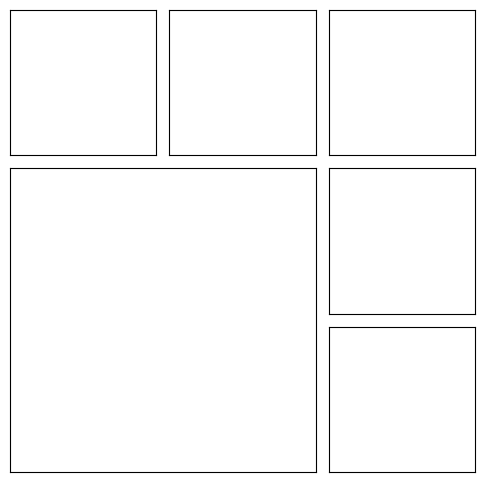

In [18]:
layout="""
AABBCC
AABBCC
DDDDEE
DDDDEE
DDDDGG
DDDDGG
"""
fig, ax = plt.subplot_mosaic(layout,figsize=(6, 6))
for i in ax.values():
    i.set_xticks([])
    i.set_yticks([])

## 5.10 Research Example: Displaying a Best Fit

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
noise = np.random.normal(1, 0.08, 100)
#noise = np.random.normal(1,0.08,100) #mean 1, spread 0.5, 100 elements
data_x = np.arange(0, 100)
data_y = np.linspace(25, 36, 100)*noise

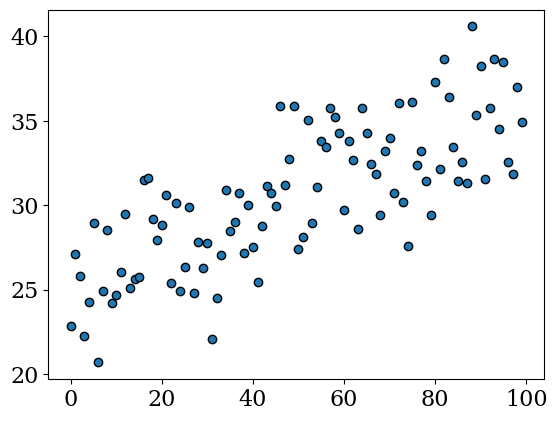

In [20]:
fit = np.polyfit(data_x, data_y, 1, cov=True) #linear
# first index takes fit params m,b,
# second specifies cov matrix
best_fit_y = fit[0][0]*data_x + fit[0][1]
plt.plot(data_x, data_y, 'o', mec='k', color='tab:blue')

In [21]:
cov = fit[1]
unc = np.sqrt(np.diagonal(cov))
print(f'Slope: {fit[0][0]:.4f} | Intercept: {fit[0][1]:.4f}')
print(f'Slope unc: {unc[0]:.4f} | Intercept unc: {unc[1]:.4f}')

Slope: 0.1113 | Intercept: 25.0582
Slope unc: 0.0096 | Intercept unc: 0.5485


In [22]:
from scipy.stats import multivariate_normal

fit_cov = multivariate_normal(mean=np.array([fit[0][0],fit[0][1]]), cov=cov)

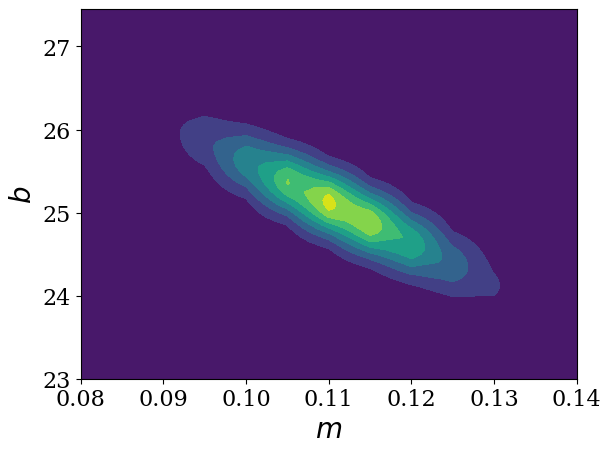

In [23]:
x, y = np.mgrid[.08:.145:.005, 23:27.5:.05]
pos = np.dstack((x,y))

fig, ax = plt.subplots()
ax.contourf(x, y, fit_cov.pdf(pos))
ax.set_xlabel(r'$m$', fontsize=20)
ax.set_ylabel(r'$b$', fontsize=20)
fig.savefig('contour-f.pdf')

In [24]:
samples = fit_cov.rvs(size=50)

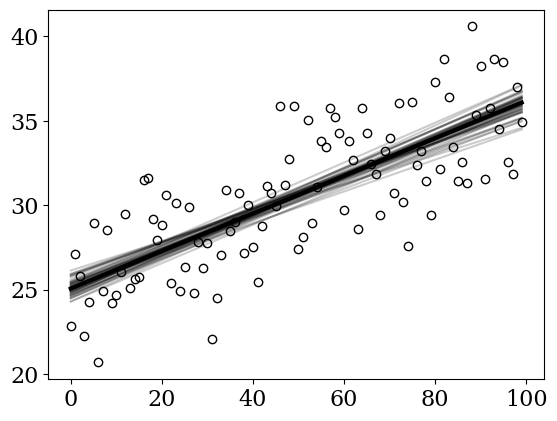

In [25]:
fig,ax = plt.subplots()
ax.plot(data_x,data_y,'o',mec='k',color='None')
ax.plot(data_x,best_fit_y,'k',lw=3)
for i in samples:
    l = data_x*i[0] + i[1] #mx+b
    ax.plot(data_x,l,alpha=0.2,color='k')

In [26]:
from matplotlib.ticker import MultipleLocator

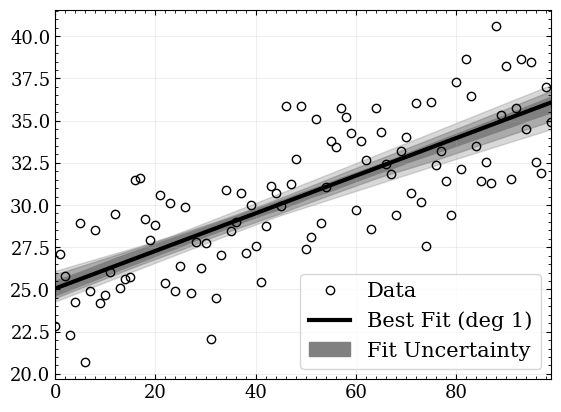

In [27]:
# Statistical calculations
sample = fit_cov.rvs(size=500)
models = np.array([data_x*i[0]+i[1] for i in samples]).reshape(50,100)
perc = np.percentile(models,[0.3,5,16,84,95,99.7],axis=0)
# Plotting
fig, ax = plt.subplots()
ax.plot(data_x,data_y,'o',mec='k',color='None',label='Data')
ax.plot(data_x,best_fit_y,'k',lw=3,label='Best Fit (deg 1)')
ax.fill_between(data_x,y1=perc[0],y2=perc[-1],color='gray',alpha=0.3)
ax.fill_between(data_x,y1=perc[1],y2=perc[-2],color='gray',alpha=0.5)
ax.fill_between(data_x,y1=perc[2],y2=perc[3],color='gray',alpha=1,label='Fit Uncertainty')
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(direction='in',
               which='both',
               top=True,
               right=True,
               labelsize=13)
ax.set_xlim(0,99)
ax.grid(alpha=0.2)
ax.legend(fontsize=15)

## 5.11 Errorbars

<ErrorbarContainer object of 3 artists>

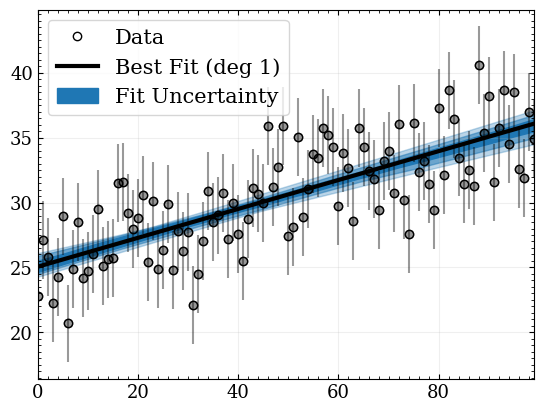

In [36]:
# Plotting
fig, ax = plt.subplots()
ax.plot(data_x,data_y,'o',mec='k',color='None',label='Data')
ax.plot(data_x,best_fit_y,'k',lw=3,label='Best Fit (deg 1)')
ax.fill_between(data_x, y1=perc[0], y2=perc[-1], color='tab:blue', alpha=0.3)
ax.fill_between(data_x, y1=perc[1], y2=perc[-2], color='tab:blue', alpha=0.5)
ax.fill_between(data_x, y1=perc[2], y2=perc[3], color='tab:blue', alpha=1,label='Fit Uncertainty')
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(direction='in',
               which='both',
               top=True,
               right=True,
               labelsize=13)
ax.set_xlim(0,99)
ax.grid(alpha=0.2)
ax.legend(fontsize=15)
ax.errorbar(data_x,data_y,yerr=3,fmt='o',color='k',alpha=0.4)

## 5.12 Plotting N-Dimentional Data

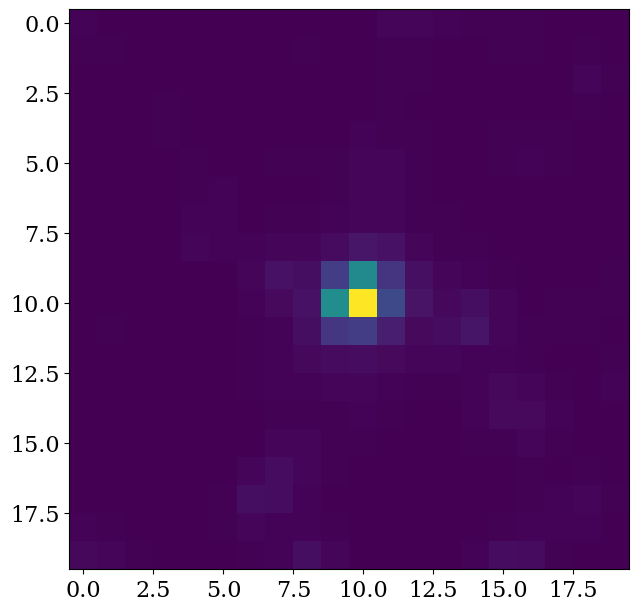

In [37]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

im_array = fits.getdata('BookDatasets/TESS/HAT-P-11/0.fits')

fig, ax = plt.subplots(figsize=(7.5,6),constrained_layout=True)
ax.imshow(im_array)

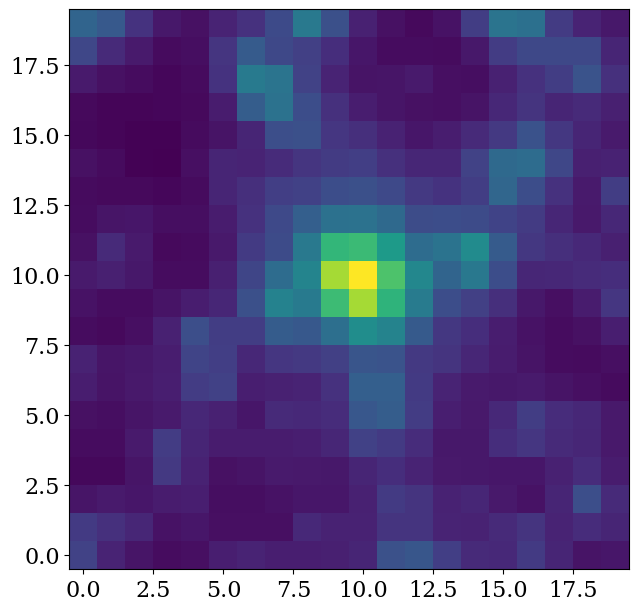

In [38]:
fig, ax = plt.subplots(figsize=(7.5,6),constrained_layout=True)
ax.imshow(np.log10(im_array),origin='lower')

## 5.13 Colorbars

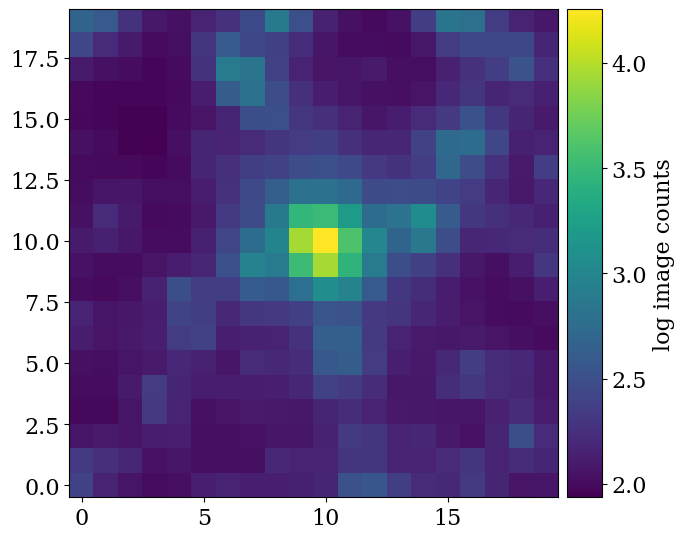

In [39]:
fig, ax = plt.subplots(figsize=(6,6),constrained_layout=True)
mappable = ax.imshow(np.log10(im_array),origin='lower')

# Now for the colorbar
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', size='7%', pad='2%')

plt.colorbar(mappable=mappable,cax=cax,label='log image counts')

## 5.14 Summary